<a href="https://colab.research.google.com/github/QuothTheRaven42/small_projects/blob/master/choropleth_coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
# kaggle datase on global covid 19 through July 6th, 2020 
df = pd.read_csv('covid_19_clean_complete.csv')
# will use plotly to make static image of current infection numbers
# then an animated map with a time-based slider

In [ ]:
# renaming columns
df = df.rename(columns={'Country/Region':'Country'})
df = df.rename(columns={'ObservationDate':'Date'})

# manipulating dataframe
df_countries = df.groupby(['Country', 'Date']).sum().reset_index().sort_values('Date', ascending=False)
df_countries = df_countries.drop_duplicates(subset=['Country'])
df_countries = df_countries[df_countries['Confirmed']>0]

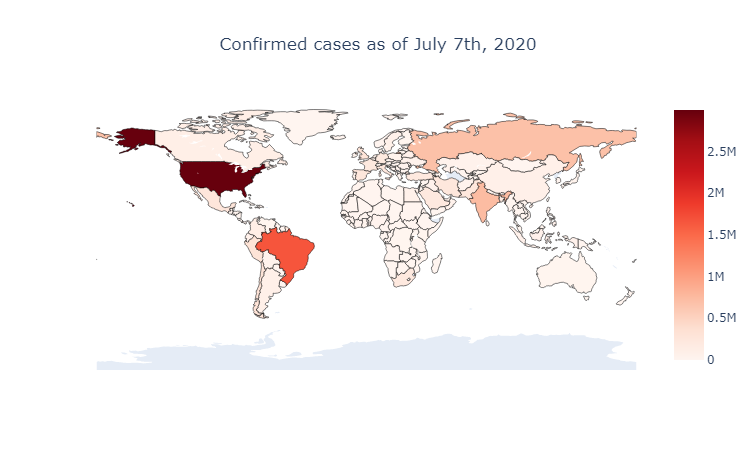

In [ ]:
# creating choropleth map
fig = go.Figure(data=go.Choropleth(locations=df_countries['Country'], 
                                   locationmode='country names', 
                                   z=df_countries['Confirmed'],
                                   colorscale='Reds',
                                   marker_line_color='black',
                                   marker_line_width=0.5
                                  )
               )

fig.update_layout(title_text='Confirmed cases as of July 7th, 2020',
                  title_x=0.5,
                  geo=dict(
                        showframe=False,
                        showcoastlines=False,
                        projection_type='equirectangular'
                          )
                 )


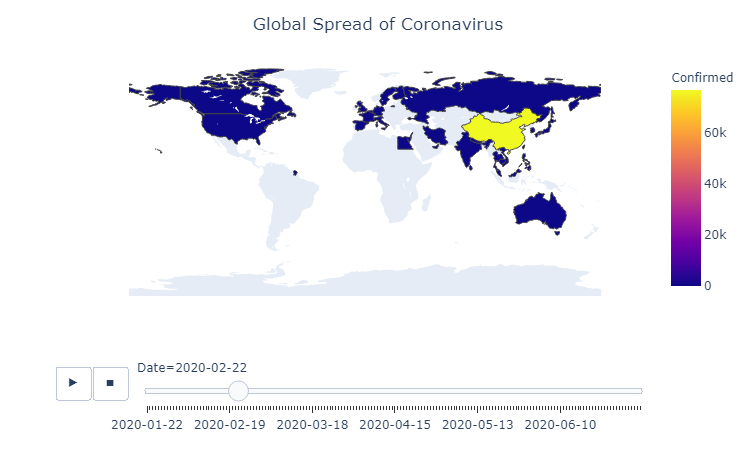

In [ ]:
# Manipulating the original dataframe
df_countrydate = df[df['Confirmed']>0]
df_countrydate = df_countrydate.groupby(['Date','Country']).sum().reset_index()
df_countrydate

# Creating the visualization
fig = px.choropleth(df_countrydate, 
                    locations="Country", 
                    locationmode = "country names",
                    color="Confirmed", 
                    hover_name="Country", 
                    animation_frame="Date"
                   )
fig.update_layout(
    title_text = 'Global Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show(renderer='jupyterlab')